# Importing all dependencies

In [13]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/seattle-broadband-speed-test/socrata_metadata.json
/kaggle/input/seattle-broadband-speed-test/broadband-speed-test.csv


# Preview of speed data

In [14]:
speed_data = pd.read_csv('/kaggle/input/seattle-broadband-speed-test/broadband-speed-test.csv')
df = speed_data
speed_data.head()

,id,actual_download,actual_upload,advertised_download,advertised_upload,connection_type,cost_of_service,date_pretty,isp,isp_user,min_rtt,timestamp,seattle_blkgrpce10
0,1,530.17,253.08,NaN,NaN,wired,dont_know,"Wed, 10 Feb 2016 12:58:16 GMT","AS2828 MCI Communications Services, Inc. d/b/a...",XO,2.0,1455109096,NaN
1,2,24.34,48.62,NaN,NaN,wireless-single,50_75,"Wed, 10 Feb 2016 13:56:47 GMT",AS174 Cogent Communications,comcast,2.0,1455112607,5.303301e+11
2,3,10.34,42.77,NaN,NaN,wireless-single,100_or_above,"Wed, 10 Feb 2016 13:58:08 GMT",AS174 Cogent Communications,comcast,2.0,1455112688,NaN
3,4,7.60,15.09,NaN,NaN,wireless-multiple,100_or_above,"Wed, 10 Feb 2016 14:43:11 GMT",AS174 Cogent Communications,level3,39.0,1455115391,5.303301e+11
4,5,9.47,0.69,NaN,12.0,wireless-multiple,50_75,"Wed, 10 Feb 2016 15:59:51 GMT",centurylink,centurylink,19.0,1455119991,5.303301e+11


# Cleaning data

All missing values for advertised download and upload speeds are imputed using advertised values for other customers who have the same service and pay the same price(or pay in the same range). For example, if there's missing value for a cutomer with comcast as a service provider and he/she pays 25-50$ for the service, then that missing value is filled by taking the mean of other customers who have comcast and pay in the same price range.

In [57]:
df1 = pd.DataFrame(columns = df.columns)
service_cost = speed_data['cost_of_service'].unique()
service_provider = speed_data['isp'].unique()
for i in service_provider:
    for j in service_cost:
        df2 = speed_data.loc[(speed_data['cost_of_service'] == j) & (speed_data['isp'] == i)]
        x = df2['advertised_download'].unique()
        y = df2['advertised_upload'].unique()
        x = x[np.isfinite(x)]
        y = y[np.isfinite(y)]
        if len(x) < 1:
            df2['advertised_download'] = df2['advertised_download'].fillna(0)
        else:
            df2['advertised_download'] = df2['advertised_download'].fillna(np.mean(x))
        if len(y) < 1:
            df2['advertised_upload'] = df2['advertised_upload'].fillna(0)
        else:
            df2['advertised_upload'] = df2['advertised_upload'].fillna(np.mean(x))
        df1 = pd.concat([df1, df2])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence 

In [58]:
df1.head()

,connection_type,actual_download,actual_upload,advertised_download,advertised_upload,cost_of_service,date_pretty,difference_download,difference_upload,id,isp,isp_user,min_rtt,seattle_blkgrpce10,timestamp,upload_download_factor
1866,wireless-multiple,1.53,1.25,4.0,4.0,dont_know,"Mon, 21 Mar 2016 16:59:13 GMT",2.47,2.75,1867,"AS2828 MCI Communications Services, Inc. d/b/a...",unknown,40.0,5.303301e+11,1458579553,2.745
1523,wired,273.68,537.54,0.0,0.0,dont_know,"Mon, 22 Feb 2016 09:58:16 GMT",-273.68,-537.54,1524,AS174 Cogent Communications,comcast,1.0,5.303301e+11,1456135096,327.434
2521,wireless-multiple,32.90,31.24,0.0,0.0,dont_know,"Thu, 25 Aug 2016 06:57:44 GMT",-32.90,-31.24,2522,AS174 Cogent Communications,City Guest Network,2.0,5.303301e+11,1472108264,36.024
2907,wireless-multiple,13.76,19.94,0.0,0.0,dont_know,"Wed, 04 Jan 2017 11:34:38 GMT",-13.76,-19.94,2908,AS174 Cogent Communications,City,40.0,5.303301e+11,1483529678,15.754
1,wireless-single,24.34,48.62,6.0,6.0,50_75,"Wed, 10 Feb 2016 13:56:47 GMT",-18.34,-42.62,2,AS174 Cogent Communications,comcast,2.0,5.303301e+11,1455112607,22.602


# Dropping values with nan values

In [61]:
speed_data = df1
speed_data = speed_data.dropna()
speed_data.head()

,connection_type,actual_download,actual_upload,advertised_download,advertised_upload,cost_of_service,date_pretty,difference_download,difference_upload,id,isp,isp_user,min_rtt,seattle_blkgrpce10,timestamp,upload_download_factor
1866,wireless-multiple,1.53,1.25,4.0,4.0,dont_know,"Mon, 21 Mar 2016 16:59:13 GMT",2.47,2.75,1867,"AS2828 MCI Communications Services, Inc. d/b/a...",unknown,40.0,5.303301e+11,1458579553,2.745
1523,wired,273.68,537.54,0.0,0.0,dont_know,"Mon, 22 Feb 2016 09:58:16 GMT",-273.68,-537.54,1524,AS174 Cogent Communications,comcast,1.0,5.303301e+11,1456135096,327.434
2521,wireless-multiple,32.90,31.24,0.0,0.0,dont_know,"Thu, 25 Aug 2016 06:57:44 GMT",-32.90,-31.24,2522,AS174 Cogent Communications,City Guest Network,2.0,5.303301e+11,1472108264,36.024
2907,wireless-multiple,13.76,19.94,0.0,0.0,dont_know,"Wed, 04 Jan 2017 11:34:38 GMT",-13.76,-19.94,2908,AS174 Cogent Communications,City,40.0,5.303301e+11,1483529678,15.754
1,wireless-single,24.34,48.62,6.0,6.0,50_75,"Wed, 10 Feb 2016 13:56:47 GMT",-18.34,-42.62,2,AS174 Cogent Communications,comcast,2.0,5.303301e+11,1455112607,22.602


# Maximum advertised download and advertised upload speeds

In [62]:
print(max(speed_data['advertised_download']))
print(max(speed_data['advertised_upload']))

2000.0
2000.0


Maximum advertised download and upload speeds are 2000 MBPS

# Date 

Converting tiemstamp into pandas datetime 

In [65]:
speed_data['date_pretty'] = pd.to_datetime(speed_data['date_pretty'])

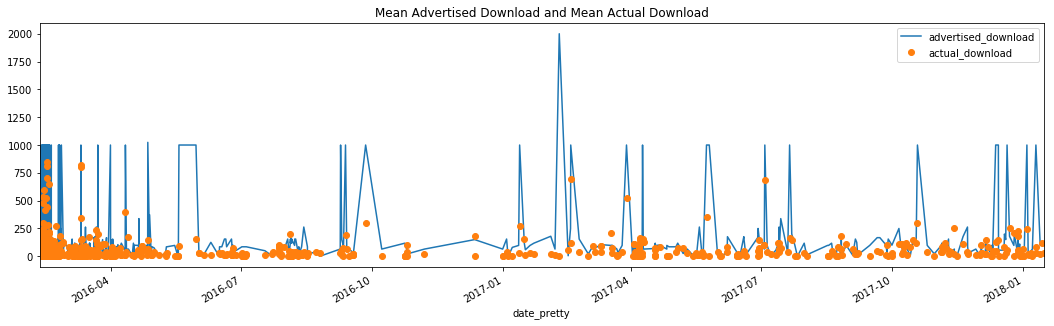

Text(0.5, 1.0, 'Mean Advertised Upload and Mean Actual Upload')

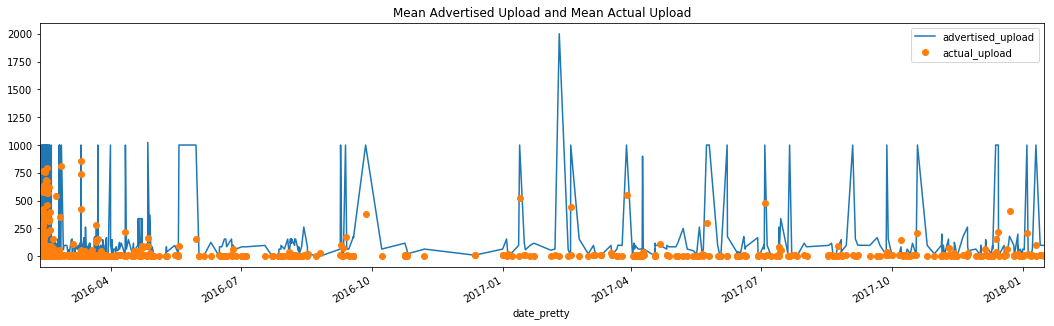

In [67]:
grouped = speed_data.dropna(axis = 0).groupby(['date_pretty'])['actual_download', 'actual_upload', 'advertised_download', 'advertised_upload'].mean()
grouped['advertised_download'].plot(figsize = (18,5),style = '-')
grouped['actual_download'].plot(figsize = (18,5),style = 'o')
plt.legend()
plt.title('Mean Advertised Download and Mean Actual Download')
plt.show()
grouped['advertised_upload'].plot(figsize = (18,5),style = '-')
grouped['actual_upload'].plot(figsize = (18,5),style = 'o')
plt.legend()
plt.title('Mean Advertised Upload and Mean Actual Upload')

We see that the download and upload speeds are consistently below the advertised download and upload speeds

# Cost of Service

In this section speed data is grouped based on cost of service and then the difference between actual and advertised interenet speed data is analysed

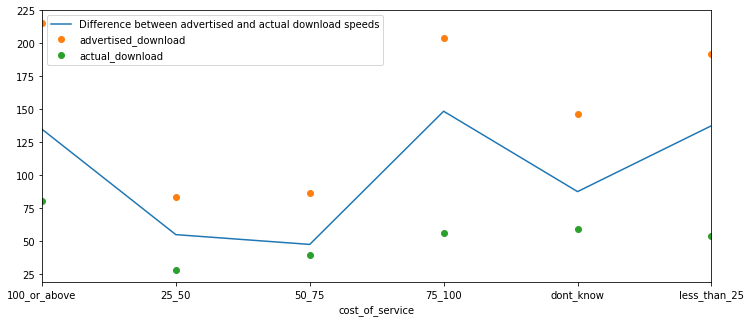

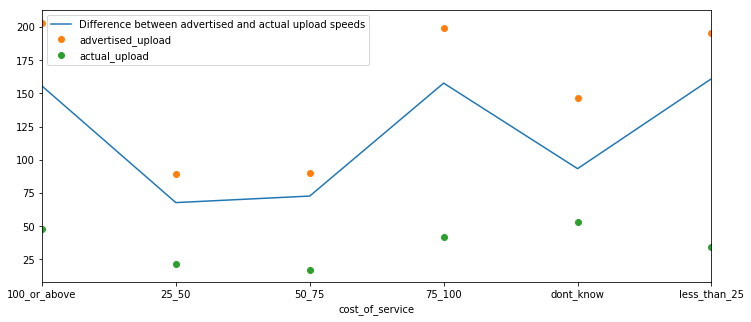

In [69]:
grouped = speed_data.groupby(['cost_of_service'])['actual_download', 'actual_upload', 'advertised_download', 'advertised_upload'].mean()
(grouped['advertised_download']-grouped['actual_download']).plot(figsize = (12,5),style = '-', label = 'Difference between advertised and actual download speeds')
grouped['advertised_download'].plot(figsize = (12,5),style = 'o')
grouped['actual_download'].plot(figsize = (12,5),style = 'o')
plt.legend()
plt.show()
(grouped['advertised_upload']-grouped['actual_upload']).plot(figsize = (12,5),style = '-', label = 'Difference between advertised and actual upload speeds')
grouped['advertised_upload'].plot(figsize = (12,5),style = 'o')
grouped['actual_upload'].plot(figsize = (12,5),style = 'o')
plt.legend()

Based on some preliminary analysis we can see that the difference between advertised and actual download/upload speeds are highest for the price range 100 or above and 75 - 100. If a customer is optimizing for price, then it makes sense to select mid-range prices to get the most value for the price paid for their internet service. Some customers may care more about individual download and upload speeds(businesses may require higher upload speeds vs individuals might prefer higher download speeds). 

# ISP

In this section, I want to understand which internet service provider matches their advertised download and upload speeds. So now I group the data based on 'isp' and calculate the difference between the mean observes advertised download and upload values

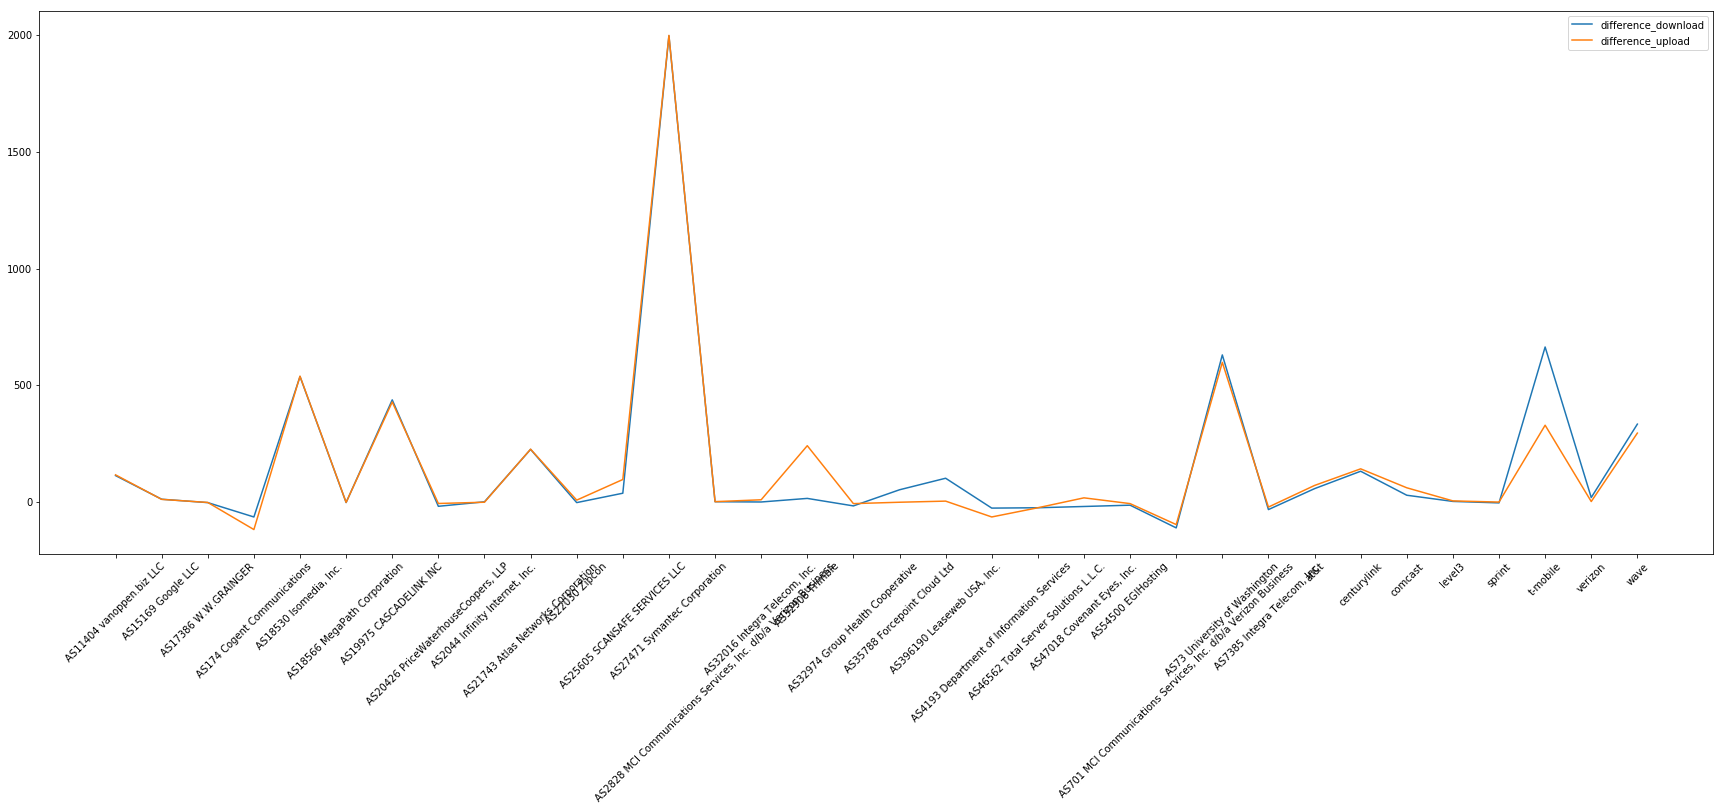

In [72]:
grouped = speed_data.groupby(['isp'])['actual_download', 'actual_upload', 'advertised_download', 'advertised_upload'].mean()
grouped['difference_download'] = grouped['advertised_download'] - grouped['actual_download']
grouped['difference_upload'] = grouped['advertised_upload'] - grouped['actual_upload']
plt.figure(figsize = (30,10))
plt.plot(grouped['difference_download'])
plt.plot(grouped['difference_upload'])
plt.tick_params(axis ='x', rotation = 45) 
plt.legend()

In [77]:
top = grouped.sort_values('difference_download', ascending=False).head(10)

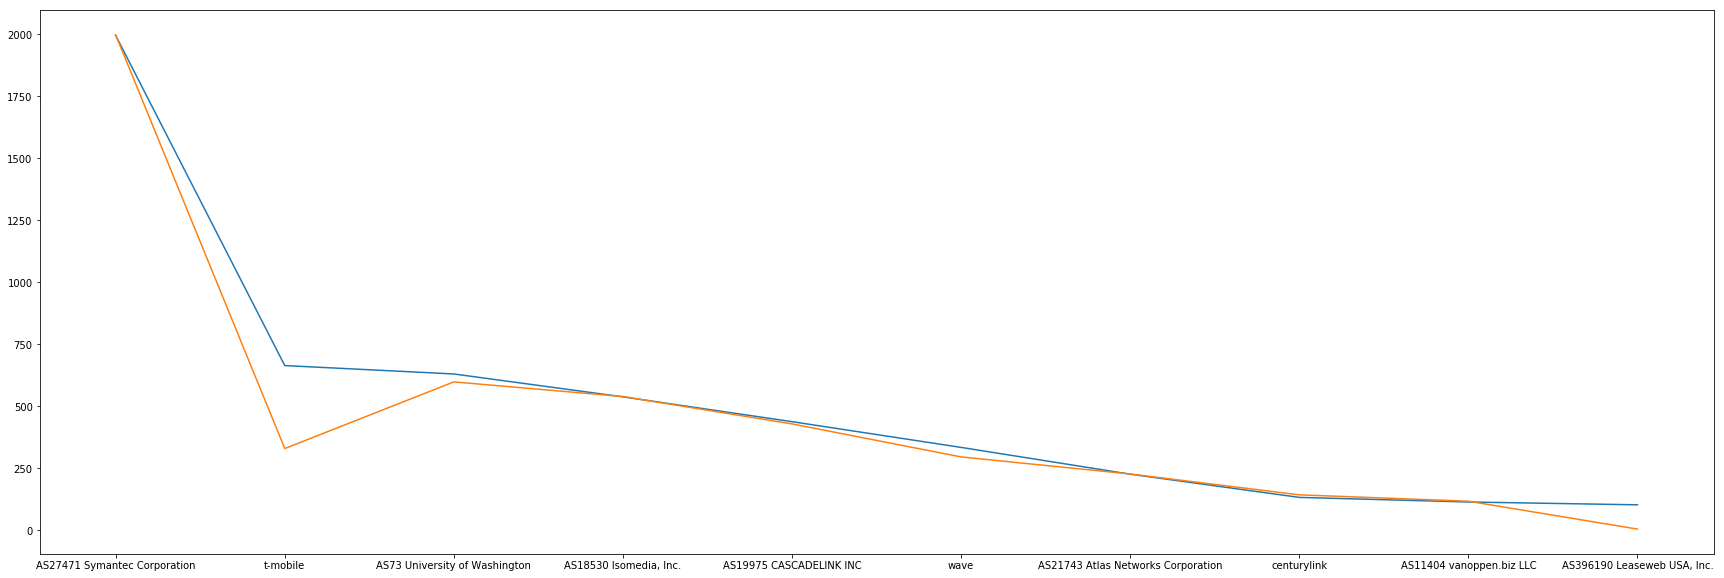

In [82]:

plt.figure(figsize = (30,10))
plt.plot(top['difference_download'])
plt.plot(top['difference_upload'])

The above table & plot shows a trend in the difference between advertised interenet speeds(both download and upload). Customers who were advertised internet speeds over 750 seldom got internet at those speeds or its possible that there could be a bias in this test because customers only initiate speed tests when their speed requirements are not met.

# Connection type

In this section I group the data based on connection type. Wired connections are usually expected to be faster than wireless but lets see what the data says

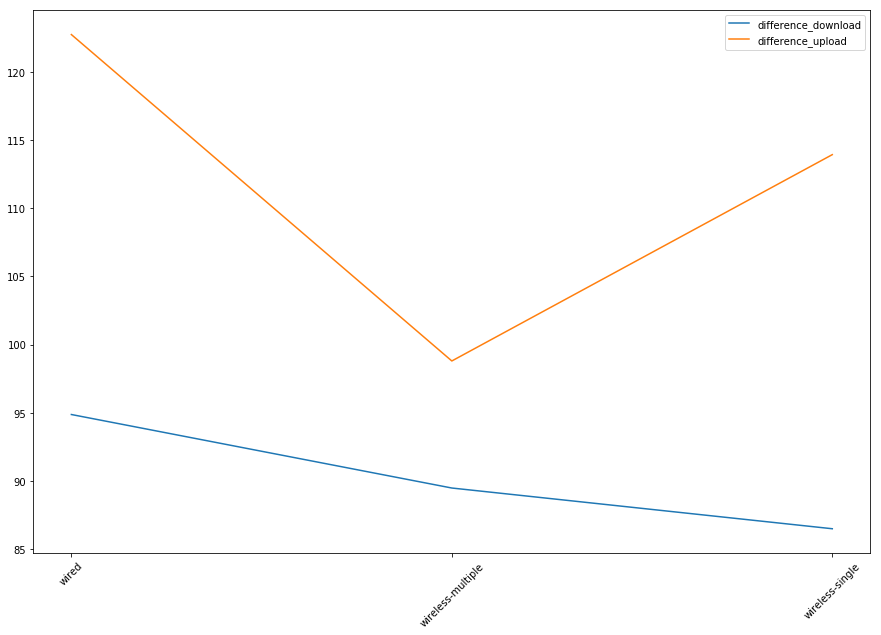

In [51]:
grouped = speed_data.groupby([' connection_type'])['actual_download', 'actual_upload', 'advertised_download', 'advertised_upload'].mean()
grouped['difference_download'] = grouped['advertised_download'] - grouped['actual_download']
grouped['difference_upload'] = grouped['advertised_upload'] - grouped['actual_upload']
plt.figure(figsize = (15,10))
plt.plot(grouped['difference_download'])
plt.plot(grouped['difference_upload'])
plt.tick_params(axis ='x', rotation = 45) 
plt.legend()

Based on the plot above, users with wired connections expereinced a bigger difference between the advertised and actual download speeds. But this is not the full picture because we dont know if that particular user would have experienced bigger differences in their internet speeds if they had used a wireless network. 

# Calulating a speed metric

Since most users care about download speeds more than upload speeds, I use download rate and 10% of upload rate to calcualte speedfactor. Its the ratio of difference between download and upload speeds and the sum of download and upload speeds


In [83]:
speed_data['difference_download'] = speed_data['advertised_download'] - speed_data['actual_download']
speed_data['difference_upload'] = speed_data['advertised_upload'] - speed_data['actual_upload']
speed_data['upload_download_factor'] = abs(speed_data['difference_download'] + 0.1 * speed_data['difference_upload'])

In [125]:
grouped_speeds = speed_data.groupby(['cost_of_service',  'isp_user'])['advertised_download', 'advertised_upload','upload_download_factor'].mean().sort_values(by = 'upload_download_factor')
grouped_speeds

advertised_download  \
cost_of_service isp_user                                        
25_50           Boost Mobile                              0.0   
50_75           EasyStreet                                7.0   
                Global Capacity                           0.0   
less_than_25    Sprint                                    5.0   
dont_know       unknown                                   4.0   
...                                                       ...   
50_75           cascadelink                            1024.0   
25_50           Cascadelink Gigabit                    1000.0   
less_than_25    Univ of Washington                     1000.0   
dont_know       University of Washington               1000.0   
                uw                                     1000.0   

                                          advertised_upload  \
cost_of_service isp_user                                      
25_50           Boost Mobile                            0.0   
50_75           EasyStreet                              1.0   
                Global Capacity                         0.0   
less_than_25    Sprint                                  5.0   
dont_know       unknown                                 4.0   
...                                                     ...   
50_75           cascadelink                          1024.0   
25_50           Cascadelink Gigabit                  1000.0   
less_than_25    Univ of Washington                   1000.0   
dont_know       University of Washington             1000.0   
                uw                                   1000.0   

                                          upload_download_factor  
cost_of_service isp_user                                          
25_50           Boost Mobile                            0.154000  
50_75           EasyStreet                              0.944000  
                Global Capacity                         1.122000  
less_than_25    Sprint                                  1.727000  
dont_know       unknown                                 2.745000  
...                                                          ...  
50_75           cascadelink                           966.240000  
25_50           Cascadelink Gigabit                   998.229333  
less_than_25    Univ of Washington                   1019.050000  
dont_know       University of Washington             1093.036000  
                uw                                   1099.425000  

[69 rows x 3 columns]

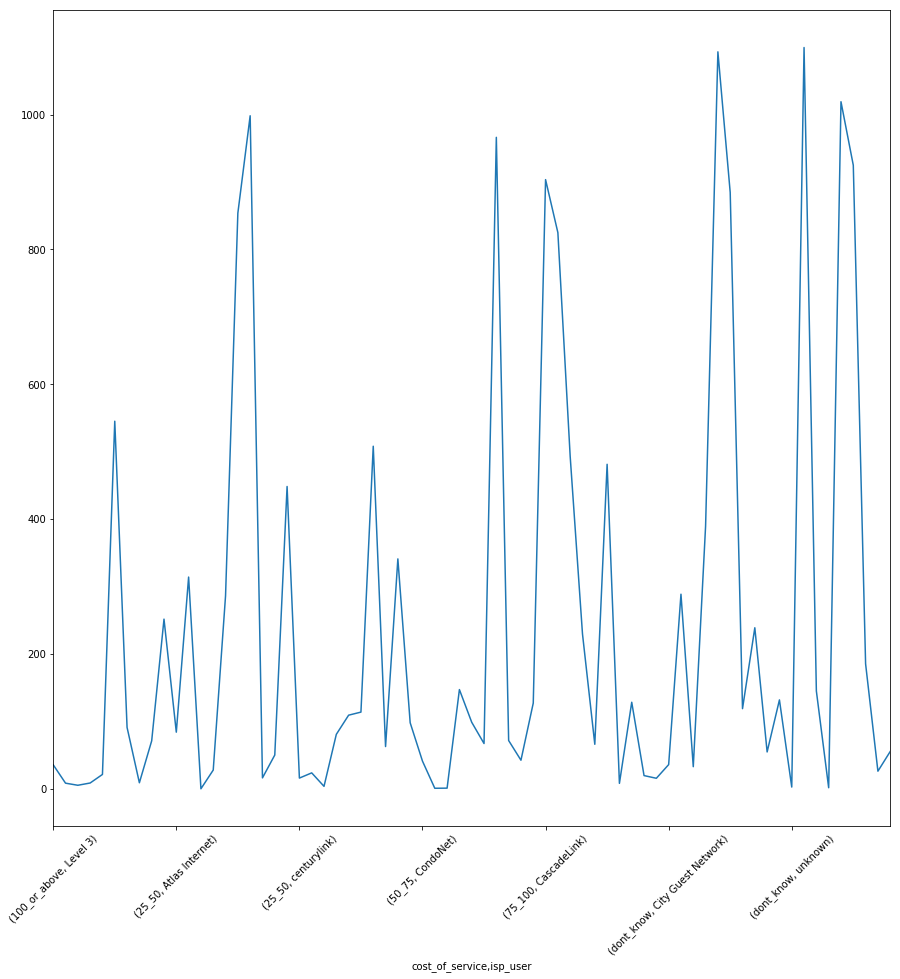

In [114]:
speed_data.groupby(['cost_of_service',  'isp_user'])['upload_download_factor'].mean().plot(figsize = (15,15))

plt.tick_params(axis ='x', rotation = 45) 

The table and plot above show speeds and prices for different ISPs.The lower the value of 'upload_download_factor', the better the service. Noticeable, service providers who do not promise high speeds are consistent in provinding close to advertised speeds. However, there is no information on their geographic coverage in the city of Seattle. Among the well known ISPs sprint has great options for lower prices and speeds close to advertised speeds based on the table above. 